In [13]:
from ldpc_channel import LdpcChannel
import os
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt

In [14]:
#4/7 Rate
#rate="4/7"
#save_folder = "./bit_error_results_47"
#hamming=True
#dv=3
#dc=7
#N_values=[98, 203, 497, 1001]

#1/2 Rate
#rate="1/2"
#save_folder = "./bit_error_results_12"
#hamming=False
#dv=4
#dc=8
#N_values=[96, 200, 504, 1000]

#1/3 Rate
rate="1/3"
save_folder = "./bit_error_results_13"
dv=4
dc=6
hamming=False
N_values=[102, 198, 498, 1002]

In [15]:
def generate_groups(N=98, N_bits=98000,
                    ps=[0.5, 0.2, 0.1, 0.05, 0.02, 0.01, 0.005, 0.002, 0.001, 5e-4, 2e-4, 1e-4, 5e-5, 2e-5, 1e-5]):
    """
    dv = 3 # número de ramos que saem de cada v-node para a camada CND = número de 1s nas colunas
    dc = 7 # número de ramos que saem de cada c-node para a camada VND = número de 1s nas linhas
    N = 98 # tamanho da palavra código
    """
    n_groups = int(N_bits/N)
    if not os.path.exists(save_folder):
        os.mkdir(save_folder)
    method = "ldpc"

    for p in ps:
        save_path_original = save_folder + f"/{N}-{p}-{method}-bits-original.npy"    

        if not os.path.isfile(save_path_original):  
            original_bits_groups = np.zeros((1, N_bits)).reshape(-1, N) 
            with open(save_path_original, "wb") as f:
                np.save(f, original_bits_groups)

        save_path_decoded = save_folder + f"/{N}-{p}-{method}-bits-decoded.npy"
        if not os.path.isfile(save_path_decoded):
            print(f"p = {p}")
            ldpc_channel = LdpcChannel(p, dv, dc, N, iterations=100)
            decoded_bits_groups = []
            for i in tqdm(range(n_groups)):
                decoded_bits_groups.append(ldpc_channel.transmit()) 
            decoded_bits_groups = np.array(decoded_bits_groups)
            with open(save_path_decoded, 'wb') as f:
                np.save(f, decoded_bits_groups)
        else: 
            with open(save_path_decoded, "rb") as f:
                decoded_bits_groups = np.load(f)

In [16]:
def generate_groups(N=98, N_bits=98000,
                    ps=[0.5, 0.2, 0.1, 0.05, 0.02, 0.01, 0.005, 0.002, 0.001, 5e-4, 2e-4, 1e-4, 5e-5, 2e-5, 1e-5]):
    """
    dv = 3 # número de ramos que saem de cada v-node para a camada CND = número de 1s nas colunas
    dc = 7 # número de ramos que saem de cada c-node para a camada VND = número de 1s nas linhas
    N = 98 # tamanho da palavra código
    """
    n_groups = int(N_bits/N)
    if not os.path.exists(save_folder):
        os.mkdir(save_folder)
    method = "ldpc"

    for p in ps:
        save_path_original = save_folder + f"/{N}-{p}-{method}-bits-original.npy"    

        if not os.path.isfile(save_path_original):  
            original_bits_groups = np.zeros((1, N_bits)).reshape(-1, N) 
            with open(save_path_original, "wb") as f:
                np.save(f, original_bits_groups)

        save_path_decoded = save_folder + f"/{N}-{p}-{method}-bits-decoded.npy"
        if not os.path.isfile(save_path_decoded):
            print(f"p = {p}")
            ldpc_channel = LdpcChannel(p, dv, dc, N, iterations=100)
            decoded_bits_groups = []
            for i in tqdm(range(n_groups)):
                decoded_bits_groups.append(ldpc_channel.transmit()) 
            decoded_bits_groups = np.array(decoded_bits_groups)
            with open(save_path_decoded, 'wb') as f:
                np.save(f, decoded_bits_groups)
        else: 
            with open(save_path_decoded, "rb") as f:
                decoded_bits_groups = np.load(f)]

def get_info_bit_error_probas(N=98, 
                              ps=[0.5, 0.2, 0.1, 0.05, 0.02, 0.01, 0.005, 0.002, 0.001, 5e-4, 2e-4, 1e-4, 5e-5, 2e-5, 1e-5]):
    method = "ldpc"
    info_bit_error_probas = []

    for p in ps:
        save_path_original = save_folder + f"/{N}-{p}-{method}-bits-original.npy"
        with open(save_path_original, "rb") as f:
            original_bits_groups = np.load(f)

        save_path_decoded = save_folder + f"/{N}-{p}-{method}-bits-decoded.npy"
        with open(save_path_decoded, "rb") as f:
            decoded_bits_groups = np.load(f)
            
        original = original_bits_groups.reshape(-1)
        decoded = decoded_bits_groups.reshape(-1)
        info_bit_error_proba = np.not_equal(original, decoded).sum()/len(original)
        info_bit_error_probas.append(info_bit_error_proba)
        
    return info_bit_error_probas

In [17]:
def plot_proba_curve(N_values=[98, 203, 497, 1001],
    ps=[0.5, 0.2, 0.1, 0.05, 0.02, 0.01, 0.005, 0.002, 0.001, 5e-4, 2e-4, 1e-4, 5e-5, 2e-5, 1e-5]):
    
    if hamming:
        info_bit_error_probas_hamming = []
        method = "hamming"

        for p in ps:
            save_path_original = save_folder + f"/{p}-{method}-bits-original.npy"
            with open(save_path_original, "rb") as f:
                original_bits_groups = np.load(f)

            save_path_decoded = save_folder + f"/{p}-{method}-bits-decoded.npy"
            with open(save_path_decoded, "rb") as f:
                decoded_bits_groups = np.load(f)
                
            original = original_bits_groups.reshape(-1)
            decoded = decoded_bits_groups.reshape(-1)
            info_bit_error_proba = np.not_equal(original, decoded).sum()/len(original)
            info_bit_error_probas_hamming.append(info_bit_error_proba)
    
    probas_list = []
    
    for N in N_values:
        generate_groups(N=N, N_bits=N*1000)
        info_bit_error_probas = get_info_bit_error_probas(N=N)
        for i in range(len(info_bit_error_probas) - 1):
            if(info_bit_error_probas[i] == 0 and info_bit_error_probas[i+1] > 0):
                info_bit_error_probas[i+1] = 0
        probas_list.append(info_bit_error_probas)
    
    fig, ax = plt.subplots(1, 1)
    for idx, N in enumerate(N_values):
        ax.loglog(ps, probas_list[idx])
        
    n = [0.5, 0.4, 0.3, 0.2, 0.1, 0]
    if hamming:
        ax.loglog(ps, info_bit_error_probas_hamming, color="darkblue")

    ax.loglog(n, n, color = "red", linestyle="--", linewidth=0.6)
    
    ax.invert_xaxis()
    ax.grid()
    ax.set_title(f"Info bit probability versus p (rate={rate})")
    ax.set_xlabel("p")
    ax.set_ylabel("pb")
    
    legends = list(map(lambda x: f"LDPC-{x}", N_values))
    if hamming:
        legends = legends + ["Hamming"] 
    legends = legends + ["No Encoding"]
    ax.legend(legends)
    
    plt.show()

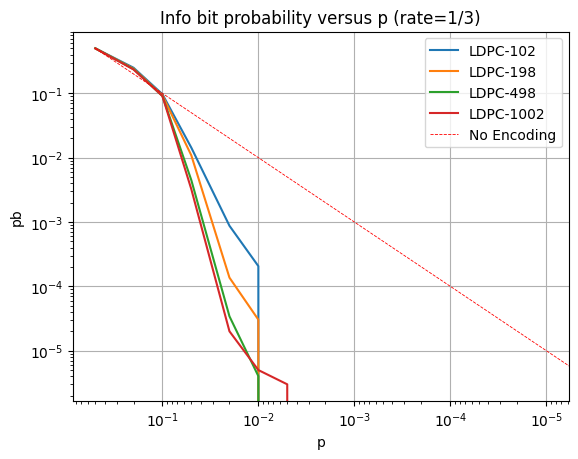

In [18]:
plot_proba_curve(N_values=N_values)